In [1]:
 # set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import matplotlib.pyplot as plt
import torch
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import numpy as np

In [3]:
"""
import importlib
import IAF_VAE_mnist
importlib.reload(IAF_VAE_mnist)
VAE = IAF_VAE_mnist.VAE.VAE
"""

'\nimport importlib\nimport IAF_VAE_mnist\nimportlib.reload(IAF_VAE_mnist)\nVAE = IAF_VAE_mnist.VAE.VAE\n'

In [4]:
from IAF_VAE_mnist.VAE import VAE
from Utils.load_4_point import x_train_4_points
data_chunk = torch.tensor(x_train_4_points)

# IAF

In [104]:
experiment_dict = {"latent_dim": 2, "n_IAF_steps": 6, "IAF_node_width" : 320}
experiment_dict = {"latent_dim": 2, "n_IAF_steps": 8, "IAF_node_width" : 1000}
vae = VAE(**experiment_dict)

running using cpu


In [107]:
#model_path = "Results_and_trained_models/IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_8__h_dim_200_IAF_node_width_320/2021_03_18-07_47_26_AM/epochs_1001__model"
#model_path = "Results_and_trained_models/IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_8__h_dim_200_IAF_node_width_320/2021_03_18-07_47_26_AM/epochs_2000__model"
model_path = "IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_6__h_dim_200_IAF_node_width_320/2021_03_18-05_34_23_AM/epochs_2000__model"
vae.load_NN_model(model_path)

loaded model from Results_and_trained_models/IAF_VAE_mnist/saved_models/__latent_dim_2__n_IAF_steps_8__h_dim_200_IAF_node_width_1000/2021_03_19-04_26_13_PM/epochs_1000__model


In [108]:
#cols = np.array([(255, 242, 204), (226, 240, 217), (242, 242, 242), (180, 199, 231)])/255
cols = np.array([(255, 242, 204), (226, 240, 217), (244, 177, 131), (180, 199, 231)])/255

Results_and_trained_models/IAF_VAE_mnist/saved_models/__latent_dim_2__n_IAF_steps_8__h_dim_200_IAF_node_width_1000/2021_03_19-04_26_13_PM/epochs_1000__model


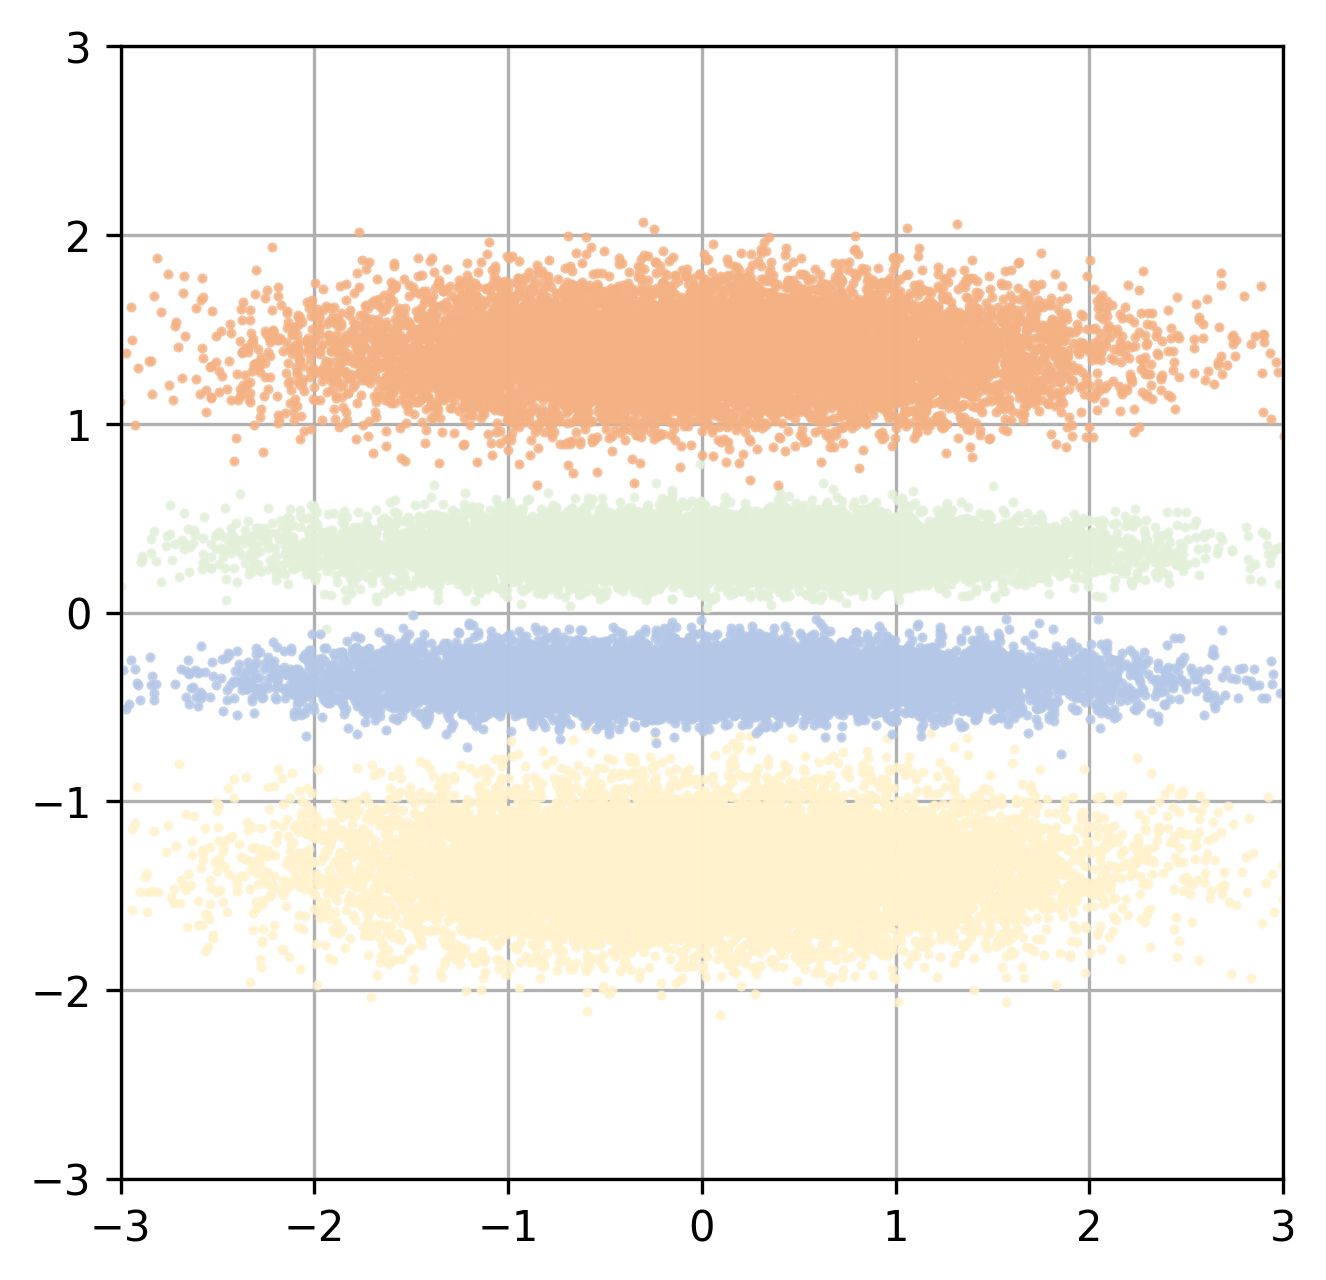

<Figure size 1800x1200 with 0 Axes>

In [109]:

fig, ax = plt.subplots(figsize=(5,5))
n_points_latent_vis = 4
#cols = mpl.cm.rainbow(np.linspace(0.1, 0.9, n_points_latent_vis))
plt.figure()
for point_n in range(n_points_latent_vis):
    point_repeat = np.zeros((10000, 1, 28, 28))
    point_repeat[:, :, :, :] = data_chunk[point_n, :, :, :]
    encoding_2D = vae.get_latent_encoding(torch.tensor(point_repeat, dtype=torch.float32).to(vae.device))
    ax.scatter(encoding_2D[:, 0], encoding_2D[:, 1], color=cols[point_n, :], s=2, alpha=0.8)
#ax.set_xlabel(r"$z_1$")
#ax.set_ylabel(r"$z_2$")
lim = 3
ax.set_ylim((-lim, lim))
ax.set_xlim((-lim, lim))
ax.set_axisbelow(True)
ax.grid()
plt.savefig("")
print(model_path)
#fig.savefig("Results_and_trained_models/IAF_VAE_mnist/Final_Figures/iaf.png")

# NO IAF

In [89]:
experiment_dict = {"latent_dim": 2, "n_IAF_steps": 0, "IAF_node_width" : 320}
vae = VAE(**experiment_dict)
epochs = 1000
daddy_path = f"Results_and_trained_models/IAF_VAE_mnist/4_point/no_IAF_4_point/latent_dim_2__n_IAF_steps_0__h_dim_200_IAF_node_width_320/"
time =  "2021_03_18-06_02_46_AM" #"2021_03_18-10_59_27_AM"#
model_path = f"{daddy_path}{time}/epochs_{epochs}__model"
model_path = "Results_and_trained_models/IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_0__h_dim_200_IAF_node_width_320/2021_03_19-07_19_30_AM/epochs_500__model"
vae.load_NN_model(model_path)

running using cpu
loaded model from Results_and_trained_models/IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_0__h_dim_200_IAF_node_width_320/2021_03_19-07_19_30_AM/epochs_500__model


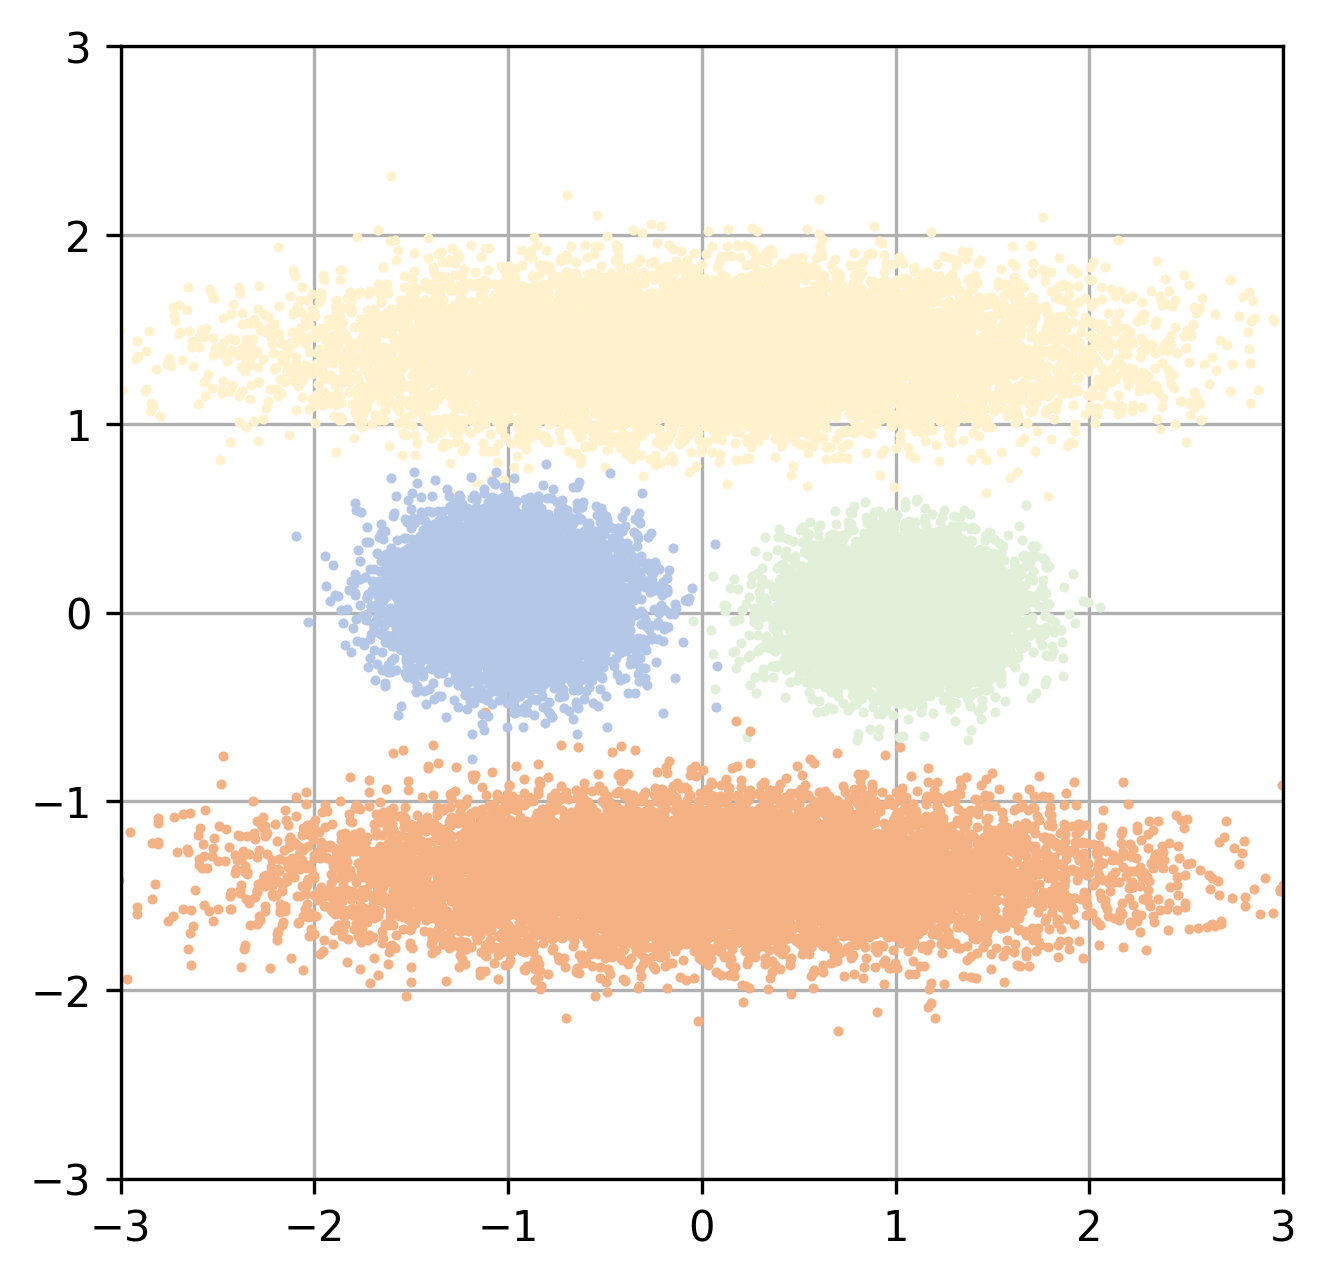

<Figure size 1800x1200 with 0 Axes>

In [90]:
fig, ax = plt.subplots(figsize=(5,5))
n_points_latent_vis = 4
#cols = mpl.cm.rainbow(np.linspace(0.1, 0.9, n_points_latent_vis))
plt.figure()
for point_n in range(n_points_latent_vis):
    point_repeat = np.zeros((10000, 1, 28, 28))
    point_repeat[:, :, :, :] = data_chunk[point_n, :, :, :]
    encoding_2D = vae.get_latent_encoding(torch.tensor(point_repeat, dtype=torch.float32).to(vae.device))
    ax.scatter(encoding_2D[:, 0], encoding_2D[:, 1], color=cols[point_n, :], s=2, alpha=1)
#ax.set_xlabel(r"$z_1$")
#ax.set_ylabel(r"$z_2$")
ax.set_ylim((-lim, lim))
ax.set_xlim((-lim, lim))
ax.set_axisbelow(True)
ax.grid()
fig.savefig("Results_and_trained_models/IAF_VAE_mnist/Final_Figures/no_iaf.png")

# Prior

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


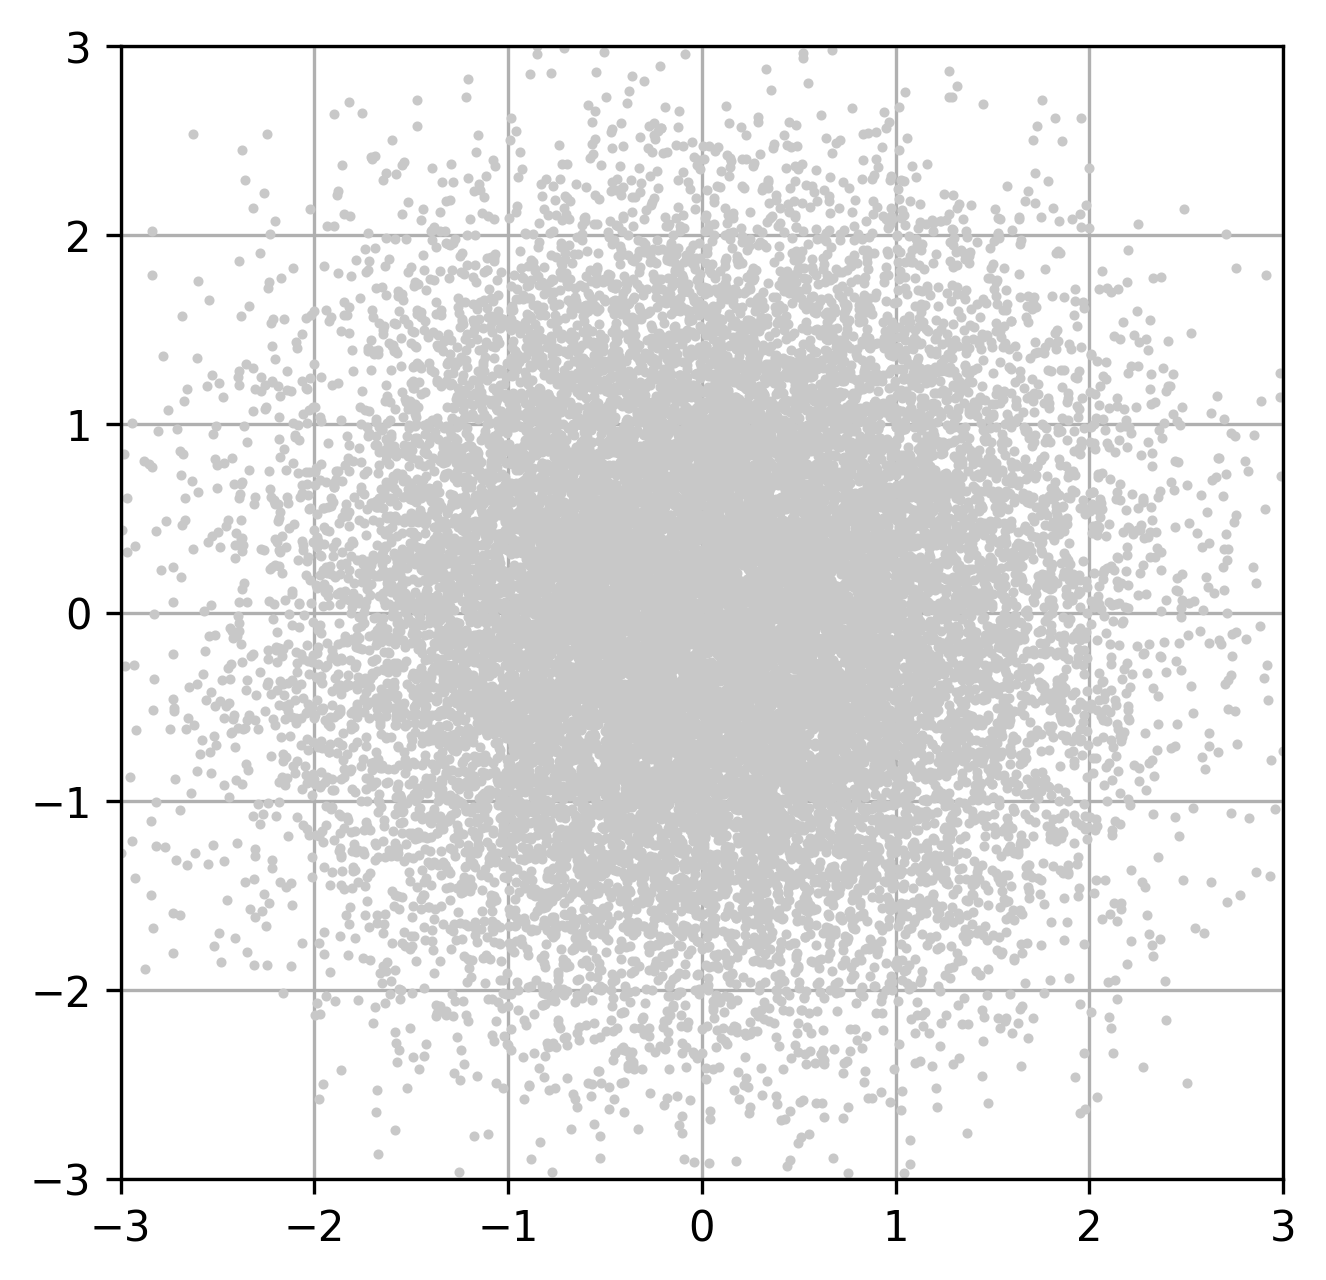

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
prior = np.random.normal(size=(20000, 2))
ax.scatter(prior[:, 0], prior[:, 1], c=np.array([200, 200, 200])/255, s=2, alpha=1)
#ax.set_xlabel(r"$z_1$")
#ax.set_ylabel(r"$z_2$")
lim=3
ax.set_ylim((-lim, lim))
ax.set_xlim((-lim, lim))
ax.set_axisbelow(True)
ax.grid()
fig.savefig("Results_and_trained_models/IAF_VAE_mnist/Final_Figures/prior.png")

# Latent space

In [7]:
experiment_dict = {"latent_dim": 2, "n_IAF_steps": 4, "IAF_node_width" : 400}
vae = VAE(**experiment_dict)
model_path = "Results_and_trained_models/IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_4__h_dim_200_IAF_node_width_400/2021_03_19-07_25_42_AM/epochs_200__model"
vae.load_NN_model(model_path)

running using cpu
loaded model from Results_and_trained_models/IAF_VAE_mnist/saved_models/latent_dim_2__n_IAF_steps_4__h_dim_200_IAF_node_width_400/2021_03_19-07_25_42_AM/epochs_200__model


In [8]:
import torch

In [18]:
figure.min(), figure.max()

(0.9, 0.9992561280727387)

In [27]:
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [38]:
new_cmap = truncate_colormap(plt.get_cmap('gray'), 0, 1)

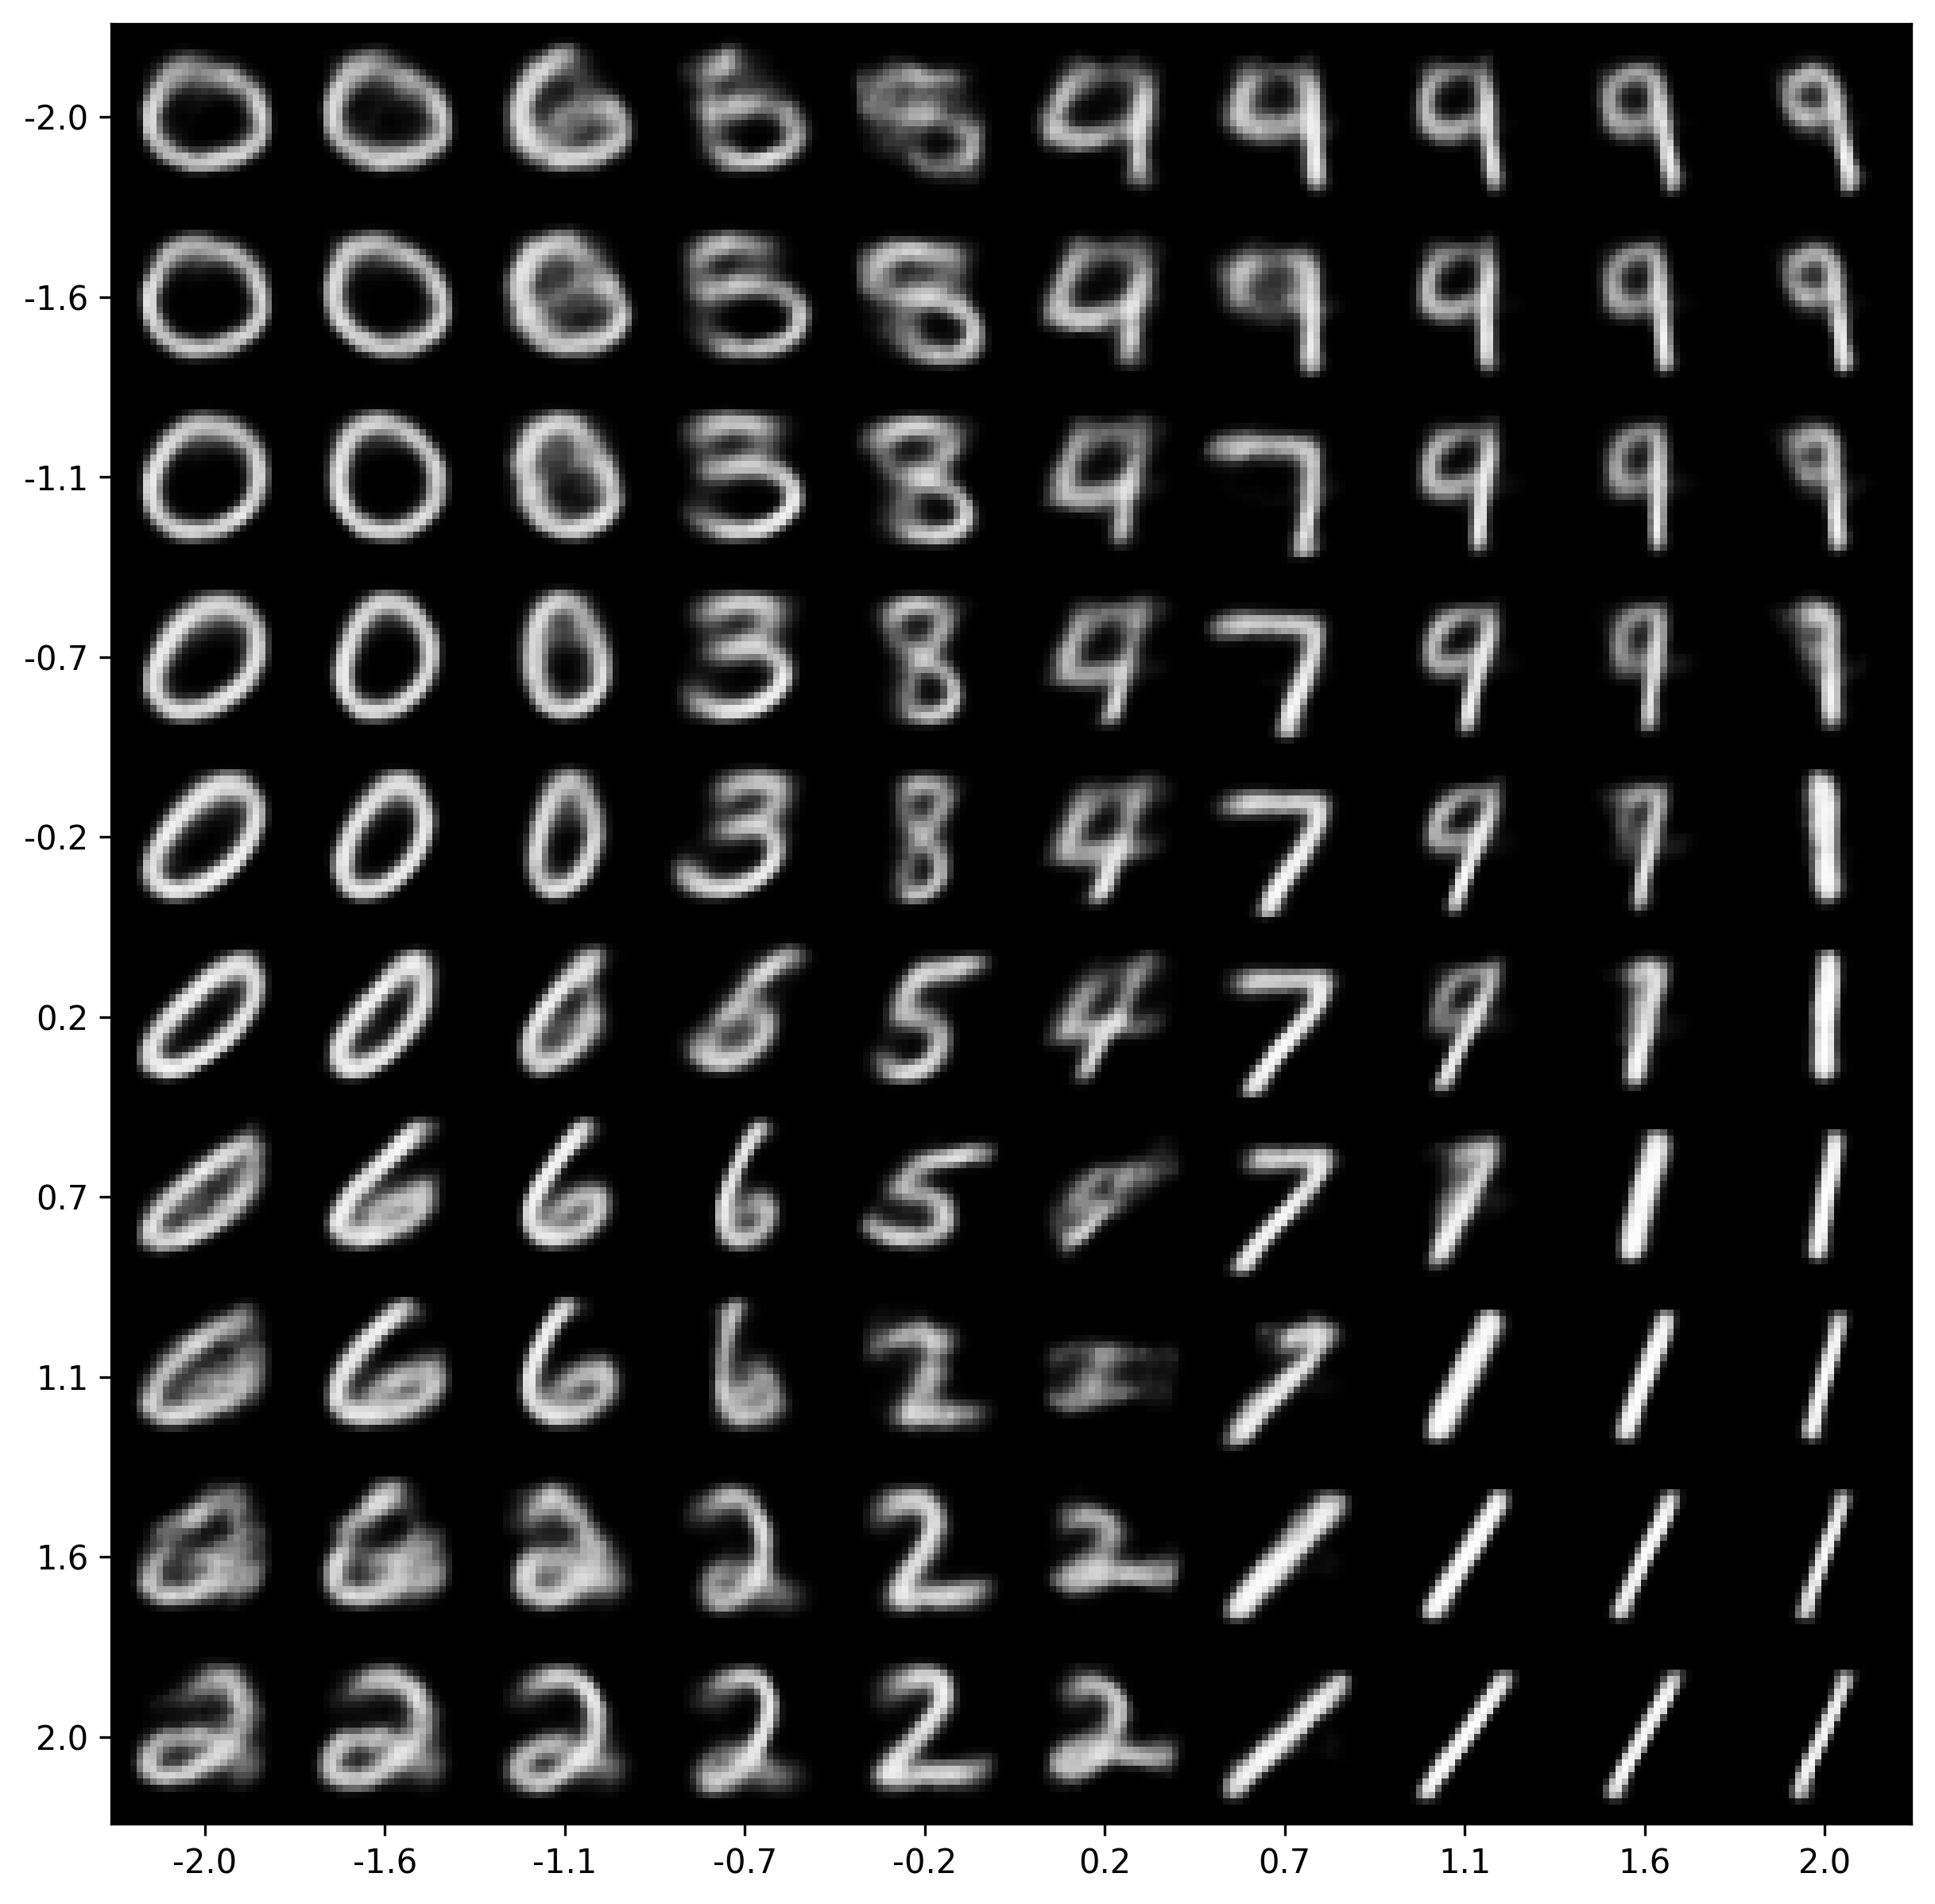

In [39]:
mpl.rcParams['figure.dpi'] = 300
n = 10  # figure with 15x15 digits
half_range = 2
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-half_range, half_range, n)
grid_y = np.linspace(-half_range, half_range, n)
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = torch.tensor(np.array([[xi, yi]])).float()
        digit = torch.sigmoid(vae.VAE_model.decoder(z_sample)).cpu().detach().numpy()
        digit = np.interp(digit, [0, 1], [0.9, 1])
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
fontsize=20
#plt.xlabel(r"$z_1$", fontsize=fontsize)
#plt.ylabel(r"$z_2$", fontsize=fontsize)
plt.imshow(figure, cmap=new_cmap )
#plt.savefig("Results_and_trained_models/IAF_VAE_mnist/Final_Figures/latent_visualisation.png")

In [ ]:
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)